In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Task 1
df = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [35]:
df.isnull().sum() #cehcking the null values.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
#To intoduce 5% missing values.
nmodify = int(len(df) * 0.05)
randomindices_sqft = np.random.choice(df.index, size=nmodify, replace=False)
randomindices_bathrooms = np.random.choice(df.index, size=nmodify, replace=False)

df.loc[randomindices_sqft, 'sqft_lot'] = np.nan
df.loc[randomindices_bathrooms, 'bathrooms'] = np.nan

print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms        1080
sqft_living         0
sqft_lot         1080
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Text(0, 0.5, 'Price')

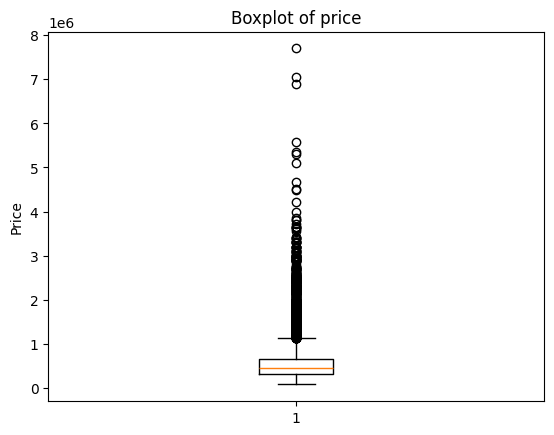

In [37]:
gr1 = plt.boxplot(df.price)
plt.title("Boxplot of price")
plt.ylabel("Price")

Text(0, 0.5, 'sqft_living')

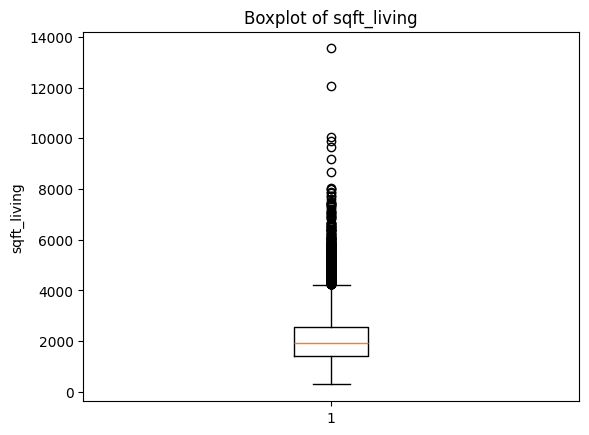

In [38]:
gr1 = plt.boxplot(df.sqft_living)
plt.title("Boxplot of sqft_living")
plt.ylabel("sqft_living")

Text(0, 0.5, 'bedrooms')

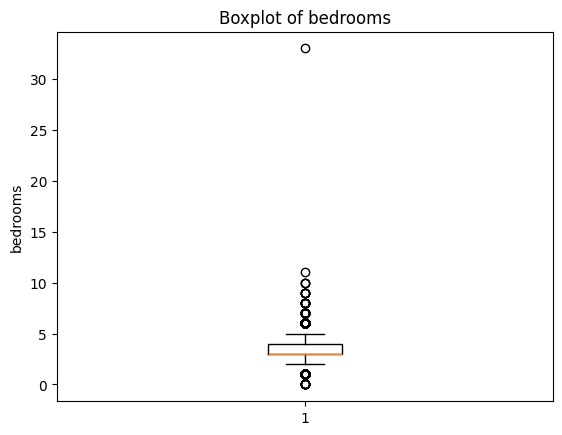

In [39]:
gr1 = plt.boxplot(df.bedrooms)
plt.title("Boxplot of bedrooms")
plt.ylabel("bedrooms")

In [40]:
#Removing outliers from price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the rows where 'bedrooms' is within the bounds
df = df[(df['price'] >= lb) & (df['price'] <= ub)]
len(df)

20467

In [41]:
#removing outliers from sqft_living
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the rows where 'bedrooms' is within the bounds
df = df[(df['sqft_living'] >= lb) & (df['sqft_living'] <= ub)]
len(df)

20147

In [42]:
#Removing outliers from bedrooms
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the rows where 'bedrooms' is within the bounds
df = df[(df['bedrooms'] >= lb) & (df['bedrooms'] <= ub)]
len(df)

'''We remove the outliers as their presence might provide us with false misleading information while training the model
which would lead to falsified insights/outcomes when we execute the model on the test data.'''

19687

In [44]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['house_age'] = df['sale_year'] - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,28


In [49]:
df['was_renovated'] = np.where(df['yr_renovated'] != 0,1,0)
df['age_since_renovation'] = np.where(df['yr_renovated'] != 0, df['sale_year'] - df['yr_renovated'], df['house_age'])

In [51]:
df['sqft_living_per_floor'] = np.where(df['floors'] != 0, df['sqft_living'] / df['floors'], 0)
df['bath_per_bed'] = np.where(df['bedrooms'] != 0, df['bathrooms'] / df['bedrooms'], 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,-122.257,1340,5650,2014,10,59,0,59,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,-122.319,1690,7639,2014,12,63,1,23,1285.0,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,-122.233,2720,8062,2015,2,82,0,82,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,-122.393,1360,5000,2014,12,49,0,49,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,-122.045,1800,7503,2015,2,28,0,28,1680.0,0.666667


In [53]:
#Task 2
numeric = ['sqft_living','sqft_lot','age_since_renovation','sqft_lot15','sqft_basement','sqft_above','house_age','lat','long','bath_per_bed','bathrooms','sqft_living_per_floor']
category = ['zipcode']
pass_through = ['bedrooms','grade','condition','floors','was_renovated','waterfront','view']

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [62]:
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])

cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("encoder", OneHotEncoder(drop="first",handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, numeric),("cat", cat_transformer,category),('pass', 'passthrough', pass_through)],remainder="drop")

In [63]:
#Task 3
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [64]:
# Pipeline 1: Gradient Boosting
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),('regressor', GradientBoostingRegressor(random_state=42))])

# Pipeline 2: Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(random_state=42))])

# Pipeline 3: XGBoost
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),('regressor', XGBRegressor(random_state=42))])

In [74]:
parameter_grid_gb = {'regressor__n_estimators': [100, 130],'regressor__learning_rate': [0.1, 0.05]}

parameter_grid_rf = {'regressor__n_estimators': [100, 130],'regressor__max_features': [0.8, 1.0]}

parameter_grid_xgb = {'regressor__n_estimators': [100, 130],'regressor__learning_rate': [0.1, 0.07]}

In [75]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['id', 'date', 'price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
# Gradient Boosting
grid_search_gb = GridSearchCV(pipeline_gb, parameter_grid_gb, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__learning_rate': [0.1, 0.05], 'regressor__n_estimators': [100, 130]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [79]:
# Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, parameter_grid_rf, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_features': [0.8, 1.0], 'regressor__n_estimators': [100, 130]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [98]:
# XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, parameter_grid_xgb, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'regressor__learning_rate': [0.1, 0.07], 'regressor__n_estimators': [100, 130]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [99]:
#Task 4
best_scores = {'Gradient Boosting': grid_search_gb.best_score_,'Random Forest': grid_search_rf.best_score_,'XGBoost': grid_search_xgb.best_score_}

best_model = max(best_scores, key=best_scores.get)
best_model_params = None
best_model_estimator = None

if best_model == 'Gradient Boosting':
    best_model_params = grid_search_gb.best_params_
    best_model_estimator = grid_search_gb.best_estimator_
elif best_model == 'Random Forest':
    best_model_params = grid_search_rf.best_params_
    best_model_estimator = grid_search_rf.best_estimator_
else:
    best_model_params = grid_search_xgb.best_params_
    best_model_estimator = grid_search_xgb.best_estimator_

print(f"The best model of all is: {best_model}")
print(f"The best parameters are: {best_model_params}")

The best model of all is: XGBoost
The best parameters are: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 130}


In [100]:
y_pred = best_model_estimator.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

final_r2 = r2_score(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2: {final_r2}")
print(f"MAE(mean square value): {final_mae}")
print(f"RMSE(root mean square value): {final_rmse}")

R2: 0.873178665081956
MAE(mean square value): 51686.56629713687
RMSE(root mean square value): 72817.03720763825


In [101]:
curr_rmse = final_rmse
previous_rmse = 212131.231023

improvement = ((previous_rmse-final_rmse)/previous_rmse)*100

print("RMSE Performance Comparison")
print(f"\nOriginal Notebook's Best RMSE: {previous_rmse}")
print(f"\nFinal Model's RMSE: {final_rmse}")
print(f"\nPercentage Improvement: {improvement}%")

data = {'Model': ['Original Best Model', 'Our Final Model'],'RMSE': [previous_rmse, final_rmse]}
df = pd.DataFrame(data, index=[1,2])

print("\n\nPerformance Table:")
print(df)

RMSE Performance Comparison

Original Notebook's Best RMSE: 212131.231023

Final Model's RMSE: 72817.03720763825

Percentage Improvement: 65.67358947738197%


Performance Table:
                 Model           RMSE
1  Original Best Model  212131.231023
2      Our Final Model   72817.037208


Text(0, 0.5, 'RMSE')

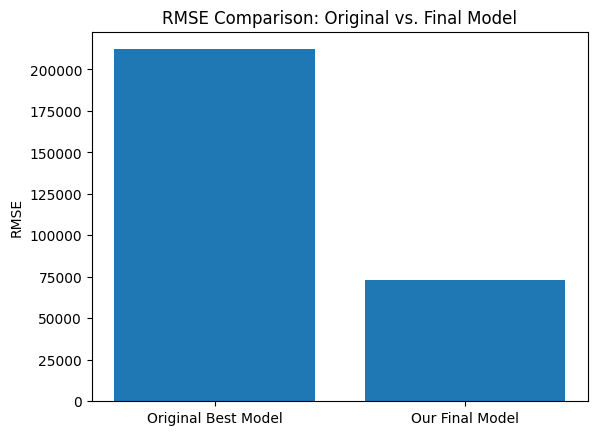

In [102]:
plt.bar(df['Model'], df['RMSE'])
plt.title('RMSE Comparison: Original vs. Final Model')
plt.ylabel('RMSE')

In [104]:
best_estimator = grid_search_xgb.best_estimator_
regmod = best_estimator.named_steps['regressor']
importance = regmod.feature_importances_
preprocessor = best_estimator.named_steps['preprocessor']
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(cols)
    elif name == 'pass':
        feature_names.extend(cols)
    elif name == 'cat':
        oh_features = list(transformer.named_steps['encoder'].get_feature_names_out(cols))
        feature_names.extend(oh_features)

In [105]:
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
fi_df = fi_df.sort_values('importance', ascending=False).reset_index(drop=True)

print("Top 5 Most Important Features")
print(fi_df.head())

Top 5 Most Important Features
         feature  importance
0          grade    0.175581
1            lat    0.133411
2    sqft_living    0.104091
3  zipcode_98004    0.046586
4  zipcode_98040    0.028830


Text(0.5, 1.0, 'Most Important Features')

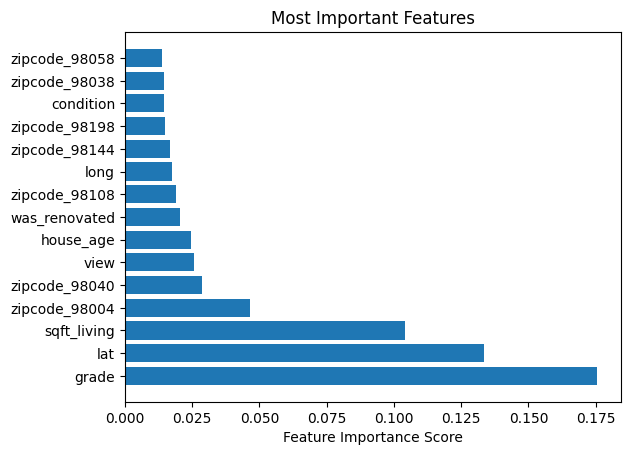

In [107]:
plt.barh(fi_df.head(15)['feature'], fi_df.head(15)['importance'])
plt.xlabel('Feature Importance Score')
plt.title('Most Important Features')

In [109]:
'''The analysis concludes that the model's most important features are logical and make sense for predicting house prices. The top 5 features—grade, lat, sqft_living, zipcode_98004, and zipcode_98040 are all direct or indirect indicators of the house's value. Moreover, the features engineered by us didn't make it to the top 5 features for predicting the prices for the property. This means that the features engineered by us were not as much helpful.'''

"The analysis concludes that the model's most important features are logical and make sense for predicting house prices. The top 5 features—grade, lat, sqft_living, zipcode_98004, and zipcode_98040 are all direct or indirect indicators of the house's value. Moreover, the features engineered by us didn't make it to the top 5 features for predicting the prices for the property. This means that the features engineered by us were not as much helpful."